# Objective

Read and investigate the dataset that contains total tweet impression and engagement counts of a sample account in a daily breakdown.

# Instructions

- Import pandas and NumPy libraries.
- Read the tweet_engagements.csv file as pandas DataFrame.
- Explore the dataset using pandas functions.

In [1]:
import pandas as pd
import seaborn as sb
import calendar

### Load data

In [2]:
df = (
    pd
    .read_csv('tweet_engagements.csv', parse_dates=['Date'], dayfirst=True)
    .assign(weekday=lambda df: df.Date.dt.weekday)
    .assign(weekday_name=lambda df: df.weekday.apply(lambda x: calendar.day_name[x]))
)

df = df.rename(columns={c: c.lower() for c in df.columns})

### Data overview

In [3]:
df.head()

,date,impression,engagement,weekday,weekday_name
0,2020-11-01,506,106,6,Sunday
1,2020-11-02,331,50,0,Monday
2,2020-11-03,377,86,1,Tuesday
3,2020-11-04,333,108,2,Wednesday
4,2020-11-05,558,31,3,Thursday


In [4]:
df.shape

(122, 5)

In [5]:
df.describe()

,impression,engagement,weekday
count,122.000000,122.000000,122.000000
mean,358.049180,53.860656,2.934426
std,147.129552,37.894659,2.003046
min,111.000000,7.000000,0.000000
25%,228.000000,25.250000,1.000000
50%,360.000000,44.000000,3.000000
75%,478.750000,72.000000,5.000000
max,619.000000,187.000000,6.000000


### Engagement

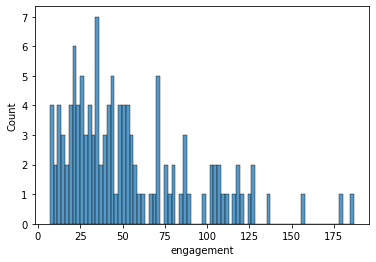

In [6]:
_=sb.histplot(df.engagement, bins=80)

### Impressions

#### How many impressions per day

In [7]:
df.groupby('date')['impression'].count().describe()

count    122.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: impression, dtype: float64

There's only one row per day

#### Are Impressions unique?

In [8]:
df.groupby('impression')['date'].count().describe(percentiles=[.90])

count    111.000000
mean       1.099099
std        0.329047
min        1.000000
50%        1.000000
90%        1.000000
max        3.000000
Name: date, dtype: float64

The values go from 1 to 3, but most of the Impressions appear only once.

In [9]:
df.groupby('impression')['date'].count().sort_values(ascending=False).head(20).reset_index()

,impression,date
0,360,3
1,342,2
2,582,2
3,228,2
4,196,2
5,436,2
6,398,2
7,268,2
8,124,2
9,112,2


### Date

#### Date range

In [10]:
df.date.min(), df.date.max()

(Timestamp('2020-11-01 00:00:00'), Timestamp('2021-04-30 00:00:00'))

#### Week days

In [11]:
count_per_weekday = df.groupby(['weekday', 'weekday_name'])['date'].count().reset_index()
count_per_weekday

,weekday,weekday_name,date
0,0,Monday,18
1,1,Tuesday,18
2,2,Wednesday,18
3,3,Thursday,18
4,4,Friday,17
5,5,Saturday,16
6,6,Sunday,17


<AxesSubplot:xlabel='weekday_name', ylabel='date'>

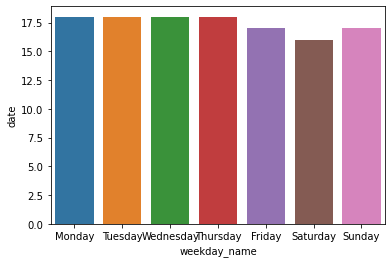

In [12]:
sb.barplot(x='weekday_name', y='date', data=count_per_weekday)

The impressions are almost evenly split between the week days, with slightly less towards the end of the week (Fri, Sat, and Sun)

### Engagement per week day

<AxesSubplot:xlabel='weekday_name', ylabel='engagement'>

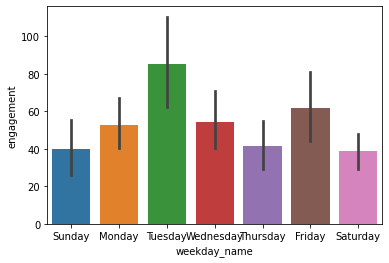

In [13]:
sb.barplot(x='weekday_name', y='engagement', data=df)

There seems to be some different degrees of engagement per day but looking at the confidence intervals alone it's hard to tell whether it's significant.